In [1]:
from birdy import WPSClient
import birdy 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

finch_server = 'http://localhost:8092/wps'   # finch 
finch_i = WPSClient(url=finch_server, progress=True)
finch = WPSClient(finch_server)

In [2]:
from os import path, listdir

path = '/home/nils/nap_niger/data/NER/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files.sort()
files[0:9]   # show the first files 

['/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19790101-19801231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19810101-19851231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19860101-19901231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19910101-19951231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19960101-20001231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20010101-20051231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20101231_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5

In [3]:
# temperature spatial plot for an example file

from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable

import numpy as np 

# example file 
nc = files[0:9]

# var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc[0])
var = ds.variables['tas'] 
lats = ds.variables['lat']
lons = ds.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actrually not rotated)
lon = lons[0,:]
lat = lats[:,0]

var_mean = np.mean(var[365:11315,:,:], axis=0) - 273.15 # mean over 30 Years 1981-2010 and transform to Celsius

In [4]:
var_mean.min()

21.668220628415327

In [31]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


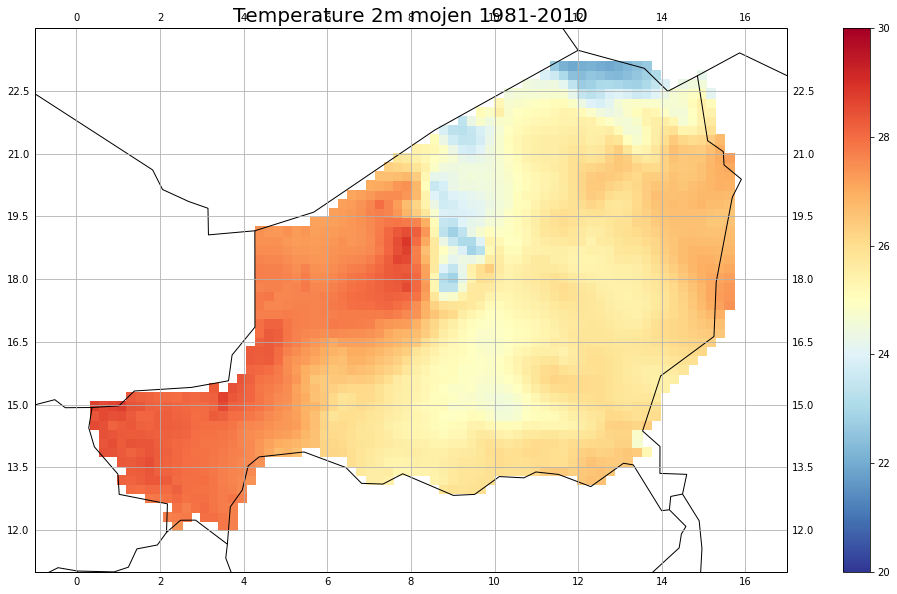

In [6]:
# prepare the plot with cartopy

from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline
lons, lats = meshgrid(lon, lat)

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-1,17,11.0,24)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Temperature 2m mojen 1981-2010', fontsize=20)

cs = plt.pcolormesh(lons, lats, var_mean , transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=20, vmax=30)
plt.colorbar(cs)
plt.savefig(fname='./pics/tas_mean_1979-2016.png')

In [7]:
from os import path, listdir

path = '/home/nils/nap_niger/data/bbox/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files.sort()
files[0:9]   # show the first files 

['/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19790101-19801231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19810101-19851231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19860101-19901231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19910101-19951231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19960101-20001231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20010101-20051231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20101231.nc',
 '/home/nils/nap_niger/data/bbox/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_2011010

In [8]:

from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable
from numpy import meshgrid
import numpy as np 

# example file 
nc = files[5]

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
var = ds.variables[var] 
lat = ds.variables['rlat']
lon = ds.variables['rlon']

lons, lats = meshgrid(lon, lat)

var_mean = np.mean(var[365:11315,:,:], axis=0) - 273.15 # mean over 30 Years 1981-2010 and transform to Celsius

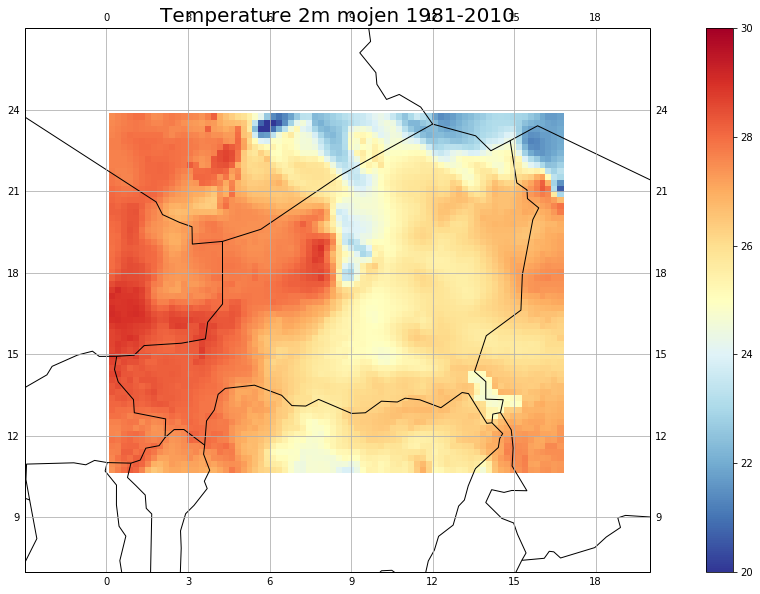

In [9]:
# prepare the plot with cartopy

from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-3,20,7,27)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Temperature 2m mojen 1981-2010', fontsize=20)

cs = plt.pcolormesh(lons, lats, var_mean , transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=20, vmax=30)
plt.colorbar(cs)
plt.savefig(fname='./pics/prcptot_mean_1979-2016_bbox.png')